T-Tests Tutorials

In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [4]:
# Define the population distribution
mu = 1
sigma = 1

# Get random samples
N = 10
X = np.random.normal(mu, sigma, N)

# Compute the sample mean
X_bar = X.mean()

# Compute the sample std
S_bar = np.sqrt((1/(N-1))*np.sum((X-X_bar)**2)) # same as S = X.std(ddof=1);

# Compute the t-statistic 
t = X_bar*np.sqrt(N)/S_bar

# The p-value is the probabilty of obtaining the t-statistic under the null 
# hypothesis; that is, 1 minus the cdf of the t-distribution, given n-1 degrees 
# of freedom (multiplied by two because we are looking at two symmetric tails)
p = 2.*(1-st.t.cdf(t, N-1))

# Compare to what we get from ttest_1samp
tstat, pval = st.ttest_1samp(X, 0)

print(f't = {t:.4f} (computed) {tstat:.4f} (from ttest_1samp)')
print(f'p = {p:.4f} (computed) {pval:.4f} (from ttest_1samp)')

t = 3.4256 (computed) 3.4256 (from ttest_1samp)
p = 0.0076 (computed) 0.0076 (from ttest_1samp)


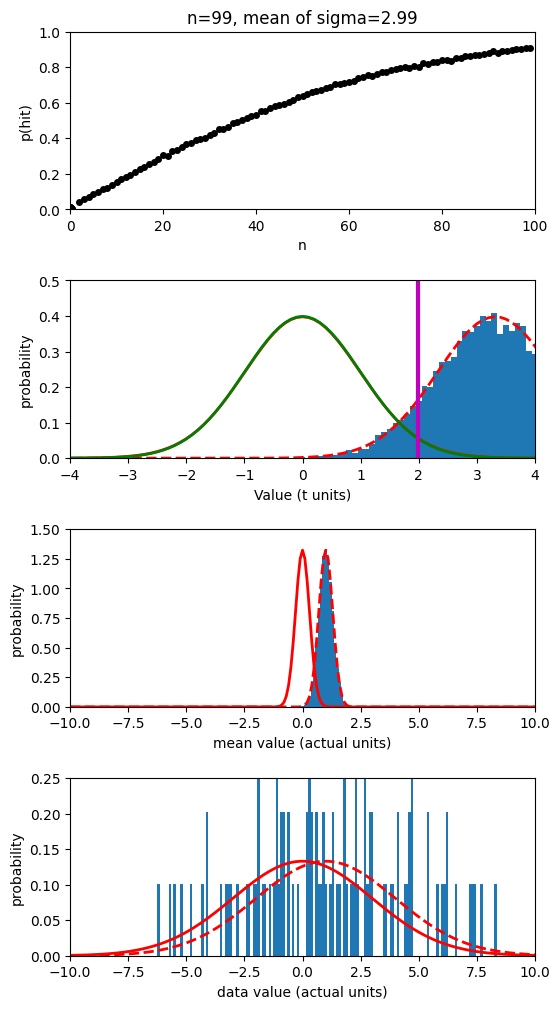

In [5]:
# Define a test distribution with a population mean different than 0 and a std of >1
test_mu  = 1
test_std = 3

# Null distribution
null_mu  = 0
null_std = test_std

# Max number of samples
max_n = 100

# for histograms
data_bin_size = 0.1
data_bins = np.arange(-10-data_bin_size/2, 10+1.5*data_bin_size, data_bin_size)
dax = (data_bins[1:] + data_bins[:-1])/2

# for simulations 
num_experiments = 10000

# Set up figure
fig, axs = plt.subplots(4, 1, figsize=(6, 12))
fig.subplots_adjust(hspace=0.4)

# Simulate different sample sizes
for n in np.arange(2, max_n):

    # Clear figures
    plt.axes(axs[1]).cla()
    plt.axes(axs[2]).cla()
    plt.axes(axs[3]).cla()

    # Simulate multiple experiments
    samples = np.random.normal(test_mu, test_std, (num_experiments, n))

    # Compute the t-statistic from each experient
    t_stats = samples.mean(axis=1)/samples.std(axis=1,ddof=1)*np.sqrt(n)

    # Top plot is probability of identifying a real effect as a function of n
    plt.axes(axs[0]).axis([0, max_n, 0, 1])
    plt.plot(0, 0, 'ko')
    plt.xlabel('n')
    plt.ylabel('p(hit)')
    plt.axes(axs[0]).plot(n, np.count_nonzero(t_stats>st.t.ppf(0.975, n-1))/num_experiments, 'k.', markersize=8)
    plt.title(f'n={n}, mean of sigma={samples.std(axis=1, ddof=1).mean():.2f}')

    # Second-to-top plot is normal, t distributions of mean, and samples
    counts, edges = np.histogram(t_stats, data_bins)
    plt.axes(axs[1]).bar(dax, np.divide(counts, np.trapz(counts, dax)), width=0.1)
    plt.plot(dax, st.t.pdf(dax, n-1), 'r-', linewidth=2)
    plt.plot(dax, st.t.pdf(dax-test_mu/test_std*np.sqrt(n), n-1), 'r--', linewidth=2)
    plt.plot(dax, st.norm.pdf(dax, 0, 1), 'g-', linewidth=2)
    plt.plot(st.t.ppf(0.975, n-1)*np.array([1.0, 1.0]), [0, 0.5], 'm-', linewidth=3)

    # set/label axes
    plt.axis([-4, 4, 0, 0.5])
    plt.xlabel('Value (t units)')
    plt.ylabel('probability')

    # Second-to-bottom plot is distributions of means
    counts, edges = np.histogram(samples.mean(axis=1), data_bins)
    plt.axes(axs[2]).bar(dax, np.divide(counts, np.trapz(counts, dax)), width=0.1)
    plt.plot(dax, st.norm.pdf(dax, null_mu, null_std/np.sqrt(n)), 'r-', linewidth=2)
    plt.plot(dax, st.norm.pdf(dax, test_mu, test_std/np.sqrt(n)), 'r--', linewidth=2)

    # set/label axes
    plt.axis([-10, 10, 0, 1.5])
    plt.xlabel('mean value (actual units)')
    plt.ylabel('probability')      

    # Bottom plot is null, test distributions. Show one 'experiment'
    counts, edges = np.histogram(samples[0,:], bins=data_bins)
    plt.axes(axs[3]).bar(dax, np.divide(counts, np.trapz(counts, dax)), width=0.1)
    plt.plot(dax, st.norm.pdf(dax, null_mu, null_std), 'r-', linewidth=2)
    plt.plot(dax, st.norm.pdf(dax, test_mu, test_std), 'r--', linewidth=2)

    # set/label axes
    plt.axis([-10, 10, 0, 0.25])
    plt.xlabel('data value (actual units)')
    plt.ylabel('probability')      

    # Clear for next plot
    display(fig)
    clear_output(wait=True)

Two-Sample paired t-test

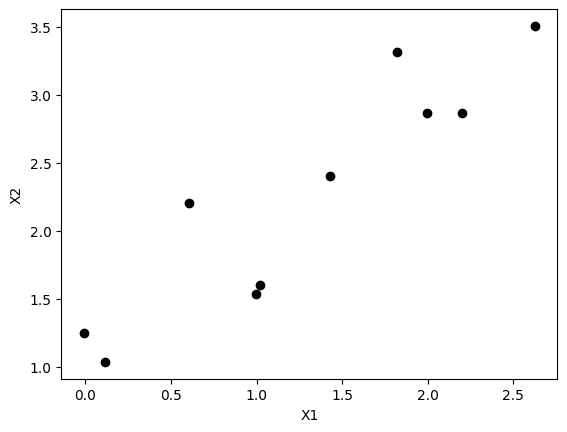

variance=0.1339 (computed), 0.1339 (python function)
t = 8.4493 (computed) 8.4493 (python function)
p = 0.0000 (computed) 0.0000 (python function)


In [7]:
# Define paired measurements in terms of a difference and then additive 0-mean noise
mu          = 1
sigma       = 1
mu_diff     = 1
mu_noise    = 0
sigma_noise = 0.5

# Get random samples
N = 10
X1 = np.random.normal(mu, sigma, N)
X2 = X1 + mu_diff + np.random.normal(mu_noise, sigma_noise, N)

# Compute the difference
D = X2 - X1

# Check correlation structure
plt.plot(X1, X2, 'ko', markerfacecolor='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Variance calculation (using covariance matrix)
cov = np.cov(X1, X2)
print(f'variance={cov[0,0]+cov[1,1]-cov[0,1]-cov[1,0]:.4f} (computed), {D.var(ddof=1):.4f} (python function)')

# Compute the t-statistic for the paired differences
t_D = (D.mean() - 0) / (D.std(ddof=1) / np.sqrt(N))

# Two-tailed p-value
p_D = 2.*(1-st.t.cdf(abs(t_D), N-1))

# Compare to scipy’s implementation
tstat, pval = st.ttest_1samp(D, 0)

print(f't = {t_D:.4f} (computed) {tstat:.4f} (python function)')
print(f'p = {p_D:.4f} (computed) {pval:.4f} (python function)')


In [ ]:
Two-sample Unpaired T-Test